<a href="https://colab.research.google.com/github/CypherGuedes/Treinamento-de-RNN/blob/main/C%C3%B3pia_de_Treinamento_de_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4422102/4422102 [==============================] - 1s 0us/step
Epoch 1/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.5176 - accuracy: 0.8093 - val_loss: 0.4141 - val_accuracy: 0.8484
Epoch 2/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.3397 - accuracy: 0.8755 - val_loss: 0.3168 - val_accuracy: 0.8865
Epoch 3/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.2885 - accuracy: 0.8936 - val_loss: 0.2972 - val_accuracy: 0.8931
Epoch 4/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.2560 - accuracy: 0.9058 - val_loss: 0.2792 - val_accuracy: 0.8988
Epoch 5/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.2295 - accuracy: 0.9152 - val_loss: 0.2903 - val_accuracy: 0.8927
Epoch 6/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.2113 - accuracy: 0.9214 - val_loss: 0.2746 - val_accuracy: 0.9007
Epoch 7/10
1875/1875 [==============================] - 57s 3

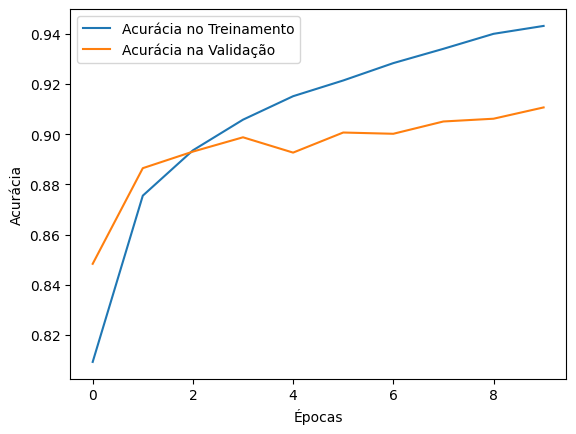

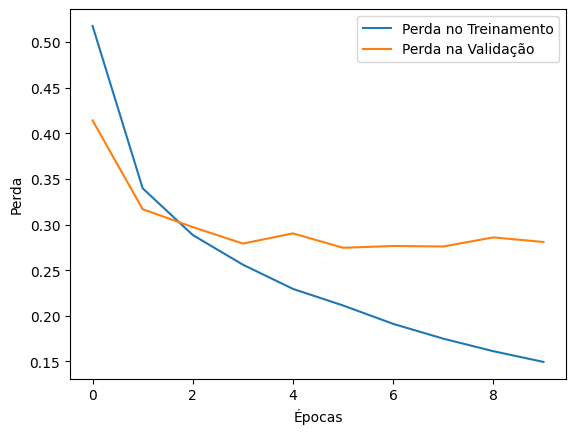

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Carregando o conjunto de dados Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalizando os valores dos pixels para o intervalo [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Adicionando uma dimensão para representar os canais de cor (escala de cinza)
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Convertendo os rótulos para a forma one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Definindo a arquitetura da rede neural
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compilando o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinando o modelo
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Avaliando o modelo nos dados de teste
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Acurácia nos dados de teste: {test_acc}')

# Visualizando a acurácia e a perda ao longo do treinamento
plt.plot(history.history['accuracy'], label='Acurácia no Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia na Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Perda no Treinamento')
plt.plot(history.history['val_loss'], label='Perda na Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.show()
